# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import pickle

## Importing and setting Data

In [ ]:
# Heart_rate = pd.read_csv("/content/heartrate_seconds_merged.csv")
Heart_rate = pd.read_csv('/content/heartrate_seconds_merged.csv', on_bad_lines='skip')

In [ ]:
Heart_rate.head()

,Id,Time,Value
0,2022484408,4/12/2016 7:21:00 AM,97.0
1,2022484408,4/12/2016 7:21:05 AM,102.0
2,2022484408,4/12/2016 7:21:10 AM,105.0
3,2022484408,4/12/2016 7:21:20 AM,103.0
4,2022484408,4/12/2016 7:21:25 AM,101.0


In [ ]:
H=len(Heart_rate)

In [ ]:
Daily_activity = pd.read_csv("https://raw.githubusercontent.com/Pranavtheking007/IBM_FIT-BIT/main/dailyActivity_merged.csv")
Daily_activity

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,5/8/2016,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847
936,8877689391,5/9/2016,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710
937,8877689391,5/10/2016,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832
938,8877689391,5/11/2016,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832


In [ ]:
I=len(Daily_activity)

In [ ]:
H/I

1053.763829787234

In [ ]:
Drop_list = []
for i in range(0,I):
  Drop_list.append(i*round(H/I))

In [ ]:
Drop_list

[0,
 1054,
 2108,
 3162,
 4216,
 5270,
 6324,
 7378,
 8432,
 9486,
 10540,
 11594,
 12648,
 13702,
 14756,
 15810,
 16864,
 17918,
 18972,
 20026,
 21080,
 22134,
 23188,
 24242,
 25296,
 26350,
 27404,
 28458,
 29512,
 30566,
 31620,
 32674,
 33728,
 34782,
 35836,
 36890,
 37944,
 38998,
 40052,
 41106,
 42160,
 43214,
 44268,
 45322,
 46376,
 47430,
 48484,
 49538,
 50592,
 51646,
 52700,
 53754,
 54808,
 55862,
 56916,
 57970,
 59024,
 60078,
 61132,
 62186,
 63240,
 64294,
 65348,
 66402,
 67456,
 68510,
 69564,
 70618,
 71672,
 72726,
 73780,
 74834,
 75888,
 76942,
 77996,
 79050,
 80104,
 81158,
 82212,
 83266,
 84320,
 85374,
 86428,
 87482,
 88536,
 89590,
 90644,
 91698,
 92752,
 93806,
 94860,
 95914,
 96968,
 98022,
 99076,
 100130,
 101184,
 102238,
 103292,
 104346,
 105400,
 106454,
 107508,
 108562,
 109616,
 110670,
 111724,
 112778,
 113832,
 114886,
 115940,
 116994,
 118048,
 119102,
 120156,
 121210,
 122264,
 123318,
 124372,
 125426,
 126480,
 127534,
 128588,
 

In [ ]:
lists = []
for i in range(0,H):
  lists.append(i)

In [ ]:
A = set(lists)
B = set(Drop_list)

In [ ]:
C = A-B

In [ ]:
C

{1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185

In [ ]:
Heart_drop = list(C)

In [ ]:
Heart_drop

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185

In [ ]:
Heart_rate.drop(Heart_drop,inplace=True)

In [ ]:
len(Heart_rate),len(Daily_activity)

(940, 940)

In [ ]:
Intensity = pd.read_csv("https://raw.githubusercontent.com/Pranavtheking007/IBM_FIT-BIT/main/hourlyIntensities_merged.csv")
Intensity

,Id,ActivityHour,TotalIntensity,AverageIntensity
0,1503960366,4/12/2016 12:00:00 AM,20,0.333333
1,1503960366,4/12/2016 1:00:00 AM,8,0.133333
2,1503960366,4/12/2016 2:00:00 AM,7,0.116667
3,1503960366,4/12/2016 3:00:00 AM,0,0.000000
4,1503960366,4/12/2016 4:00:00 AM,0,0.000000
...,...,...,...,...
22094,8877689391,5/12/2016 10:00:00 AM,12,0.200000
22095,8877689391,5/12/2016 11:00:00 AM,29,0.483333
22096,8877689391,5/12/2016 12:00:00 PM,93,1.550000
22097,8877689391,5/12/2016 1:00:00 PM,6,0.100000


In [ ]:
def drop_lists(S,D=Daily_activity):
  len_D=len(D)
  len_S=len(S)

  Drop_list = []
  for i in range(0,len_D):
    Drop_list.append(i*round(len_S/len_D))
  
  lists = []
  for i in range(0,len_S):
    lists.append(i)
  
  A = set(lists)
  B = set(Drop_list)

  C = A-B
  para_drop = list(C)

  return para_drop

In [ ]:
Intensity_drop=drop_lists(S=Intensity)

In [ ]:
Intensity_drop

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 191,


In [ ]:
Intensity.drop(Intensity_drop,inplace=True)

In [ ]:
len(Intensity),len(Daily_activity)

(921, 940)

In [ ]:
Sleep = pd.read_csv("https://raw.githubusercontent.com/Pranavtheking007/IBM_FIT-BIT/main/sleepDay_merged.csv")

In [ ]:
Sleep

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712
...,...,...,...,...,...
408,8792009665,4/30/2016 12:00:00 AM,1,343,360
409,8792009665,5/1/2016 12:00:00 AM,1,503,527
410,8792009665,5/2/2016 12:00:00 AM,1,415,423
411,8792009665,5/3/2016 12:00:00 AM,1,516,545


In [ ]:
len(Sleep)

413

In [ ]:
Weight_log = pd.read_csv("https://raw.githubusercontent.com/Pranavtheking007/IBM_FIT-BIT/main/weightLogInfo_merged.csv")

In [ ]:
A=pd.concat([Daily_activity,Weight_log],axis=1)
A.T

,0,1,2,3,4,5,6,7,8,9,...,930,931,932,933,934,935,936,937,938,939
Id,1503960366,1503960366,1503960366,1503960366,1503960366,1503960366,1503960366,1503960366,1503960366,1503960366,...,8877689391,8877689391,8877689391,8877689391,8877689391,8877689391,8877689391,8877689391,8877689391,8877689391
ActivityDate,4/12/2016,4/13/2016,4/14/2016,4/15/2016,4/16/2016,4/17/2016,4/18/2016,4/19/2016,4/20/2016,4/21/2016,...,5/3/2016,5/4/2016,5/5/2016,5/6/2016,5/7/2016,5/8/2016,5/9/2016,5/10/2016,5/11/2016,5/12/2016
TotalSteps,13162,10735,10460,9762,12669,9705,13019,15506,10544,9819,...,10818,18193,14055,21727,12332,10686,20226,10733,21420,8064
TotalDistance,8.5,6.97,6.74,6.28,8.16,6.48,8.59,9.88,6.68,6.34,...,8.21,16.299999,10.67,19.34,8.13,8.11,18.25,8.15,19.559999,6.12
TrackerDistance,8.5,6.97,6.74,6.28,8.16,6.48,8.59,9.88,6.68,6.34,...,8.21,16.299999,10.67,19.34,8.13,8.11,18.25,8.15,19.559999,6.12
LoggedActivitiesDistance,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
VeryActiveDistance,1.88,1.57,2.44,2.14,2.71,3.19,3.25,3.53,1.96,1.34,...,1.39,10.42,5.46,12.79,0.08,1.08,11.1,1.35,13.22,1.82
ModeratelyActiveDistance,0.55,0.69,0.4,1.26,0.41,0.78,0.64,1.32,0.48,0.35,...,0.1,0.31,0.82,0.29,0.96,0.2,0.8,0.46,0.41,0.04
LightActiveDistance,6.06,4.71,3.91,2.83,5.04,2.51,4.71,5.03,4.24,4.65,...,6.67,5.53,4.37,6.16,6.99,6.8,6.24,6.28,5.89,4.25
SedentaryActiveDistance,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.01,0.0,0.0,0.0,0.0,0.0,0.05,0.0,0.0,0.0


In [ ]:
len(Heart_rate)

940

In [ ]:
Heart_rate

,Id,Time,Value
0,2022484408,4/12/2016 7:21:00 AM,97.0
1054,2022484408,4/12/2016 10:03:00 AM,85.0
2108,2022484408,4/12/2016 12:28:55 PM,65.0
3162,2022484408,4/12/2016 3:35:40 PM,62.0
4216,2022484408,4/12/2016 6:05:45 PM,79.0
...,...,...,...
985490,4558609924,5/3/2016 11:11:30 PM,77.0
986544,4558609924,5/4/2016 12:23:15 PM,71.0
987598,4558609924,5/4/2016 3:03:45 PM,82.0
988652,4558609924,5/4/2016 5:25:50 PM,98.0


In [ ]:
Heart_rate.to_csv(r'Heart_rate.csv', index=False)

In [ ]:
Intensity.to_csv(r"Intensity.csv",index=False)

In [ ]:
Heart_Rate = pd.read_csv("https://raw.githubusercontent.com/Pranavtheking007/IBM_FIT-BIT/main/Heart_rate.csv")
Heart_Rate

,Id,Time,Value
0,2022484408,4/12/2016 7:21:00 AM,97
1,2022484408,4/12/2016 2:16:10 PM,88
2,2022484408,4/13/2016 8:14:00 AM,83
3,2022484408,4/13/2016 2:33:00 PM,79
4,2022484408,4/14/2016 8:46:45 AM,63
...,...,...,...
935,8877689391,5/10/2016 4:41:16 PM,71
936,8877689391,5/11/2016 8:24:28 AM,65
937,8877689391,5/11/2016 2:07:24 PM,62
938,8877689391,5/11/2016 6:07:56 PM,79


In [ ]:
Intensity_01 = pd.read_csv("https://raw.githubusercontent.com/Pranavtheking007/IBM_FIT-BIT/main/Intensity.csv")
Intensity_01

,Id,ActivityHour,TotalIntensity,AverageIntensity
0,1503960366,4/12/2016 12:00:00 AM,20,0.333333
1,1503960366,4/13/2016 12:00:00 AM,14,0.233333
2,1503960366,4/14/2016 12:00:00 AM,4,0.066667
3,1503960366,4/15/2016 12:00:00 AM,6,0.100000
4,1503960366,4/16/2016 12:00:00 AM,15,0.250000
...,...,...,...,...
916,8877689391,5/7/2016 8:00:00 PM,30,0.500000
917,8877689391,5/8/2016 8:00:00 PM,9,0.150000
918,8877689391,5/9/2016 8:00:00 PM,7,0.116667
919,8877689391,5/10/2016 8:00:00 PM,34,0.566667


In [ ]:
B=pd.concat([Daily_activity,Weight_log,Heart_Rate,Intensity_01,Sleep],axis=1)
B.T

,0,1,2,3,4,5,6,7,8,9,...,930,931,932,933,934,935,936,937,938,939
Id,1503960366,1503960366,1503960366,1503960366,1503960366,1503960366,1503960366,1503960366,1503960366,1503960366,...,8877689391,8877689391,8877689391,8877689391,8877689391,8877689391,8877689391,8877689391,8877689391,8877689391
ActivityDate,4/12/2016,4/13/2016,4/14/2016,4/15/2016,4/16/2016,4/17/2016,4/18/2016,4/19/2016,4/20/2016,4/21/2016,...,5/3/2016,5/4/2016,5/5/2016,5/6/2016,5/7/2016,5/8/2016,5/9/2016,5/10/2016,5/11/2016,5/12/2016
TotalSteps,13162,10735,10460,9762,12669,9705,13019,15506,10544,9819,...,10818,18193,14055,21727,12332,10686,20226,10733,21420,8064
TotalDistance,8.5,6.97,6.74,6.28,8.16,6.48,8.59,9.88,6.68,6.34,...,8.21,16.299999,10.67,19.34,8.13,8.11,18.25,8.15,19.559999,6.12
TrackerDistance,8.5,6.97,6.74,6.28,8.16,6.48,8.59,9.88,6.68,6.34,...,8.21,16.299999,10.67,19.34,8.13,8.11,18.25,8.15,19.559999,6.12
LoggedActivitiesDistance,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
VeryActiveDistance,1.88,1.57,2.44,2.14,2.71,3.19,3.25,3.53,1.96,1.34,...,1.39,10.42,5.46,12.79,0.08,1.08,11.1,1.35,13.22,1.82
ModeratelyActiveDistance,0.55,0.69,0.4,1.26,0.41,0.78,0.64,1.32,0.48,0.35,...,0.1,0.31,0.82,0.29,0.96,0.2,0.8,0.46,0.41,0.04
LightActiveDistance,6.06,4.71,3.91,2.83,5.04,2.51,4.71,5.03,4.24,4.65,...,6.67,5.53,4.37,6.16,6.99,6.8,6.24,6.28,5.89,4.25
SedentaryActiveDistance,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.01,0.0,0.0,0.0,0.0,0.0,0.05,0.0,0.0,0.0


In [ ]:
Fit_Bit = B

In [ ]:
Fit_Bit.drop(['Id','Date','WeightPounds','LogId','Time','SleepDay','TotalSleepRecords','TotalMinutesAsleep','ActivityDate','TrackerDistance'],axis=1,inplace=True)

In [ ]:
Fit_Bit.T

,0,1,2,3,4,5,6,7,8,9,...,930,931,932,933,934,935,936,937,938,939
TotalSteps,13162,10735,10460,9762,12669,9705,13019,15506,10544,9819,...,10818,18193,14055,21727,12332,10686,20226,10733,21420,8064
TotalDistance,8.5,6.97,6.74,6.28,8.16,6.48,8.59,9.88,6.68,6.34,...,8.21,16.299999,10.67,19.34,8.13,8.11,18.25,8.15,19.559999,6.12
LoggedActivitiesDistance,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
VeryActiveDistance,1.88,1.57,2.44,2.14,2.71,3.19,3.25,3.53,1.96,1.34,...,1.39,10.42,5.46,12.79,0.08,1.08,11.1,1.35,13.22,1.82
ModeratelyActiveDistance,0.55,0.69,0.4,1.26,0.41,0.78,0.64,1.32,0.48,0.35,...,0.1,0.31,0.82,0.29,0.96,0.2,0.8,0.46,0.41,0.04
LightActiveDistance,6.06,4.71,3.91,2.83,5.04,2.51,4.71,5.03,4.24,4.65,...,6.67,5.53,4.37,6.16,6.99,6.8,6.24,6.28,5.89,4.25
SedentaryActiveDistance,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.01,0.0,0.0,0.0,0.0,0.0,0.05,0.0,0.0,0.0
VeryActiveMinutes,25,21,30,29,36,38,42,50,28,19,...,19,66,67,96,105,17,73,18,88,23
FairlyActiveMinutes,13,19,11,34,10,20,16,31,12,8,...,3,8,15,17,28,4,19,11,12,1
LightlyActiveMinutes,328,217,181,209,221,164,233,264,205,211,...,229,212,188,232,271,245,217,224,213,137


In [ ]:
Fit_Bit.drop(['LoggedActivitiesDistance','ModeratelyActiveDistance','LightActiveDistance','SedentaryActiveDistance','FairlyActiveMinutes','LightlyActiveMinutes','IsManualReport','ActivityHour','TotalIntensity'],axis=1,inplace=True)

In [ ]:
Fit_Bit.T

,0,1,2,3,4,5,6,7,8,9,...,930,931,932,933,934,935,936,937,938,939
TotalSteps,13162.000000,10735.000000,10460.000000,9762.000000,12669.000000,9705.000000,13019.000000,15506.000000,10544.000000,9819.000000,...,10818.00,18193.000000,14055.00,21727.00,12332.00,10686.00,20226.00,10733.00,21420.000000,8064.00
TotalDistance,8.500000,6.970000,6.740000,6.280000,8.160000,6.480000,8.590000,9.880000,6.680000,6.340000,...,8.21,16.299999,10.67,19.34,8.13,8.11,18.25,8.15,19.559999,6.12
VeryActiveDistance,1.880000,1.570000,2.440000,2.140000,2.710000,3.190000,3.250000,3.530000,1.960000,1.340000,...,1.39,10.420000,5.46,12.79,0.08,1.08,11.10,1.35,13.220000,1.82
VeryActiveMinutes,25.000000,21.000000,30.000000,29.000000,36.000000,38.000000,42.000000,50.000000,28.000000,19.000000,...,19.00,66.000000,67.00,96.00,105.00,17.00,73.00,18.00,88.000000,23.00
SedentaryMinutes,728.000000,776.000000,1218.000000,726.000000,773.000000,539.000000,1149.000000,775.000000,818.000000,838.000000,...,1189.00,1154.000000,1170.00,1095.00,1036.00,1174.00,1131.00,1187.00,1127.000000,770.00
Calories,1985.000000,1797.000000,1776.000000,1745.000000,1863.000000,1728.000000,1921.000000,2035.000000,1786.000000,1775.000000,...,2817.00,3477.000000,3052.00,4015.00,4142.00,2847.00,3710.00,2832.00,3832.000000,1849.00
WeightKg,52.599998,52.599998,133.500000,56.700001,57.299999,72.400002,72.300003,69.699997,70.300003,69.900002,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fat,22.000000,NaN,NaN,NaN,NaN,25.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BMI,22.650000,22.650000,47.540001,21.450001,21.690001,27.450001,27.379999,27.250000,27.459999,27.320000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Value,97.000000,88.000000,83.000000,79.000000,63.000000,73.000000,80.000000,81.000000,79.000000,91.000000,...,64.00,62.000000,60.00,82.00,67.00,71.00,65.00,62.00,79.000000,73.00


In [ ]:
Fit_Bit.to_csv(r'Fit_Bit_modified.csv', index=False)

## Eda

In [ ]:
Fit_Bit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 940 entries, 0 to 939
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   TotalSteps          940 non-null    int64  
 1   TotalDistance       940 non-null    float64
 2   VeryActiveDistance  940 non-null    float64
 3   VeryActiveMinutes   940 non-null    int64  
 4   SedentaryMinutes    940 non-null    int64  
 5   Calories            940 non-null    int64  
 6   WeightKg            67 non-null     float64
 7   Fat                 2 non-null      float64
 8   BMI                 67 non-null     float64
 9   Value               940 non-null    int64  
 10  AverageIntensity    921 non-null    float64
 11  TotalTimeInBed      413 non-null    float64
dtypes: float64(7), int64(5)
memory usage: 127.8 KB


In [ ]:
Fit_Bit.drop(['Fat'],axis=1,inplace=True)

In [ ]:
Fit_Bit.isna().sum()

TotalSteps              0
TotalDistance           0
VeryActiveDistance      0
VeryActiveMinutes       0
SedentaryMinutes        0
Calories                0
WeightKg              873
BMI                   873
Value                   0
AverageIntensity       19
TotalTimeInBed        527
dtype: int64

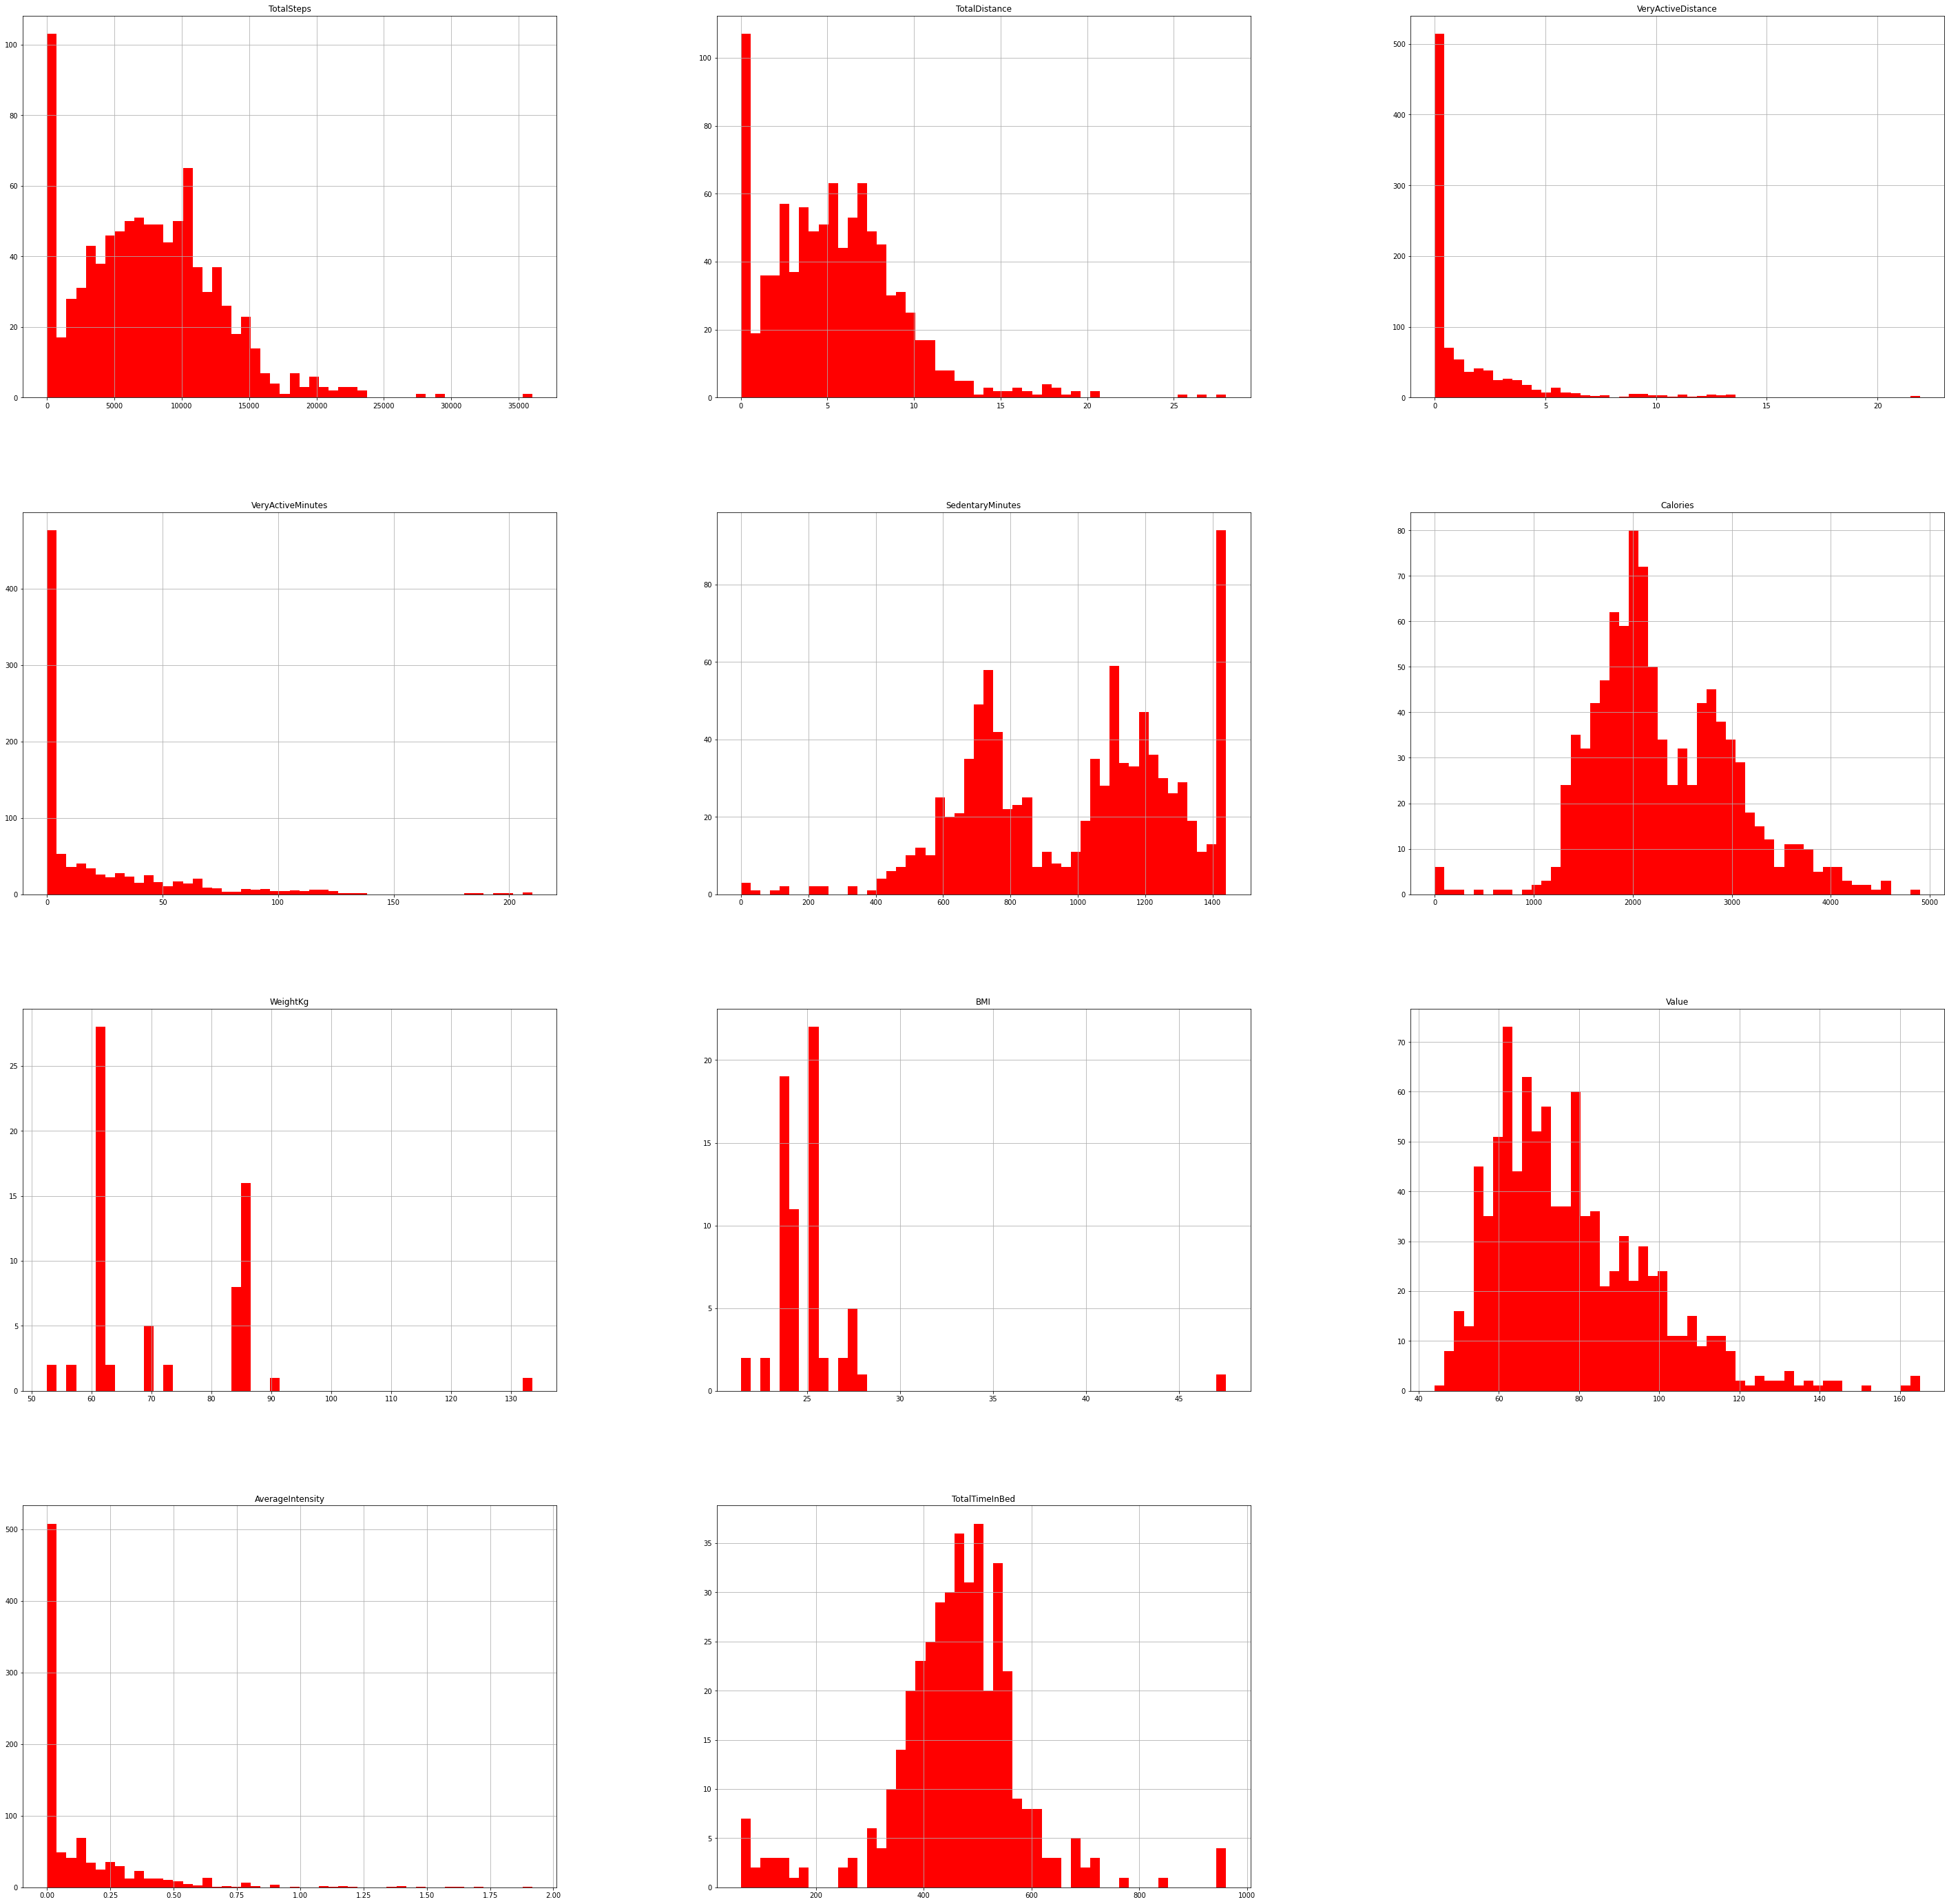

In [ ]:
Fit_Bit.hist(figsize=(50,50), bins=50, color="red");

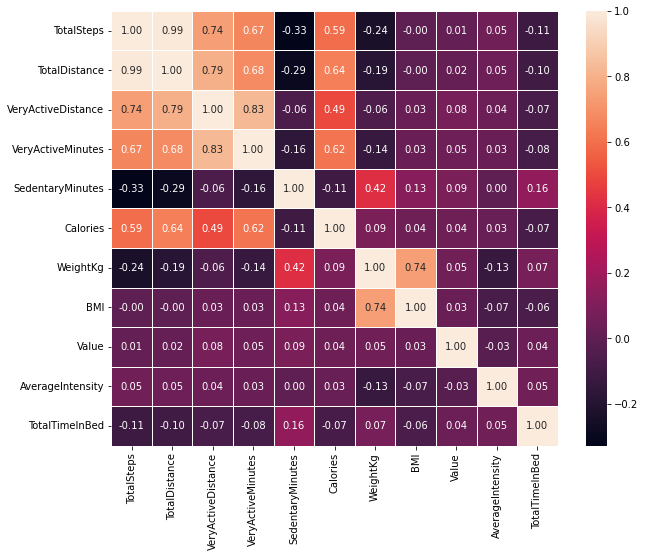

In [ ]:
corr_matrix = Fit_Bit.corr()
fig , ax = plt.subplots(figsize=(10,8))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt='.2f')

In [ ]:
for label, content in Fit_Bit.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            #Fill missing numeric valuees with median
            Fit_Bit[label] = content.fillna(content.median())

In [ ]:
Fit_Bit.isna().sum()

TotalSteps            0
TotalDistance         0
VeryActiveDistance    0
VeryActiveMinutes     0
SedentaryMinutes      0
Calories              0
WeightKg              0
BMI                   0
Value                 0
AverageIntensity      0
TotalTimeInBed        0
dtype: int64

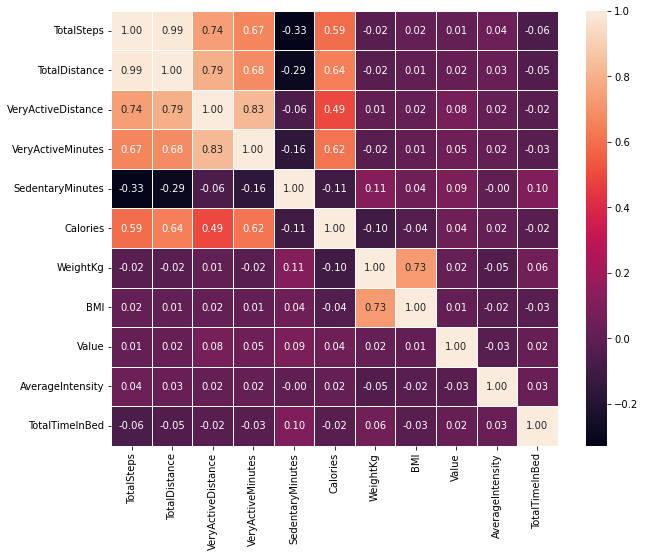

In [ ]:
corr_matrix = Fit_Bit.corr()
fig , ax = plt.subplots(figsize=(10,8))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt='.2f')

In [ ]:
Numeric = []
for label, content in Fit_Bit.items():
    if pd.api.types.is_numeric_dtype(content):
      Numeric.append(label)

In [ ]:
ct = make_column_transformer(
    (MinMaxScaler(), Numeric))

In [ ]:
ct.fit(Fit_Bit)

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['TotalSteps', 'TotalDistance',
                                  'VeryActiveDistance', 'VeryActiveMinutes',
                                  'SedentaryMinutes', 'Calories', 'WeightKg',
                                  'BMI', 'Value', 'AverageIntensity',
                                  'TotalTimeInBed'])])

In [ ]:
Fit_Bit_ct = ct.transform(Fit_Bit)

In [ ]:
# X = Fit_Bit.iloc[:, [2, 3]].values
# Y = Fit_Bit.iloc[:, [3, 4]].values
# Y = Fit_Bit.iloc[:, [3, 4]].values

X = Fit_Bit[['TotalSteps', 'VeryActiveMinutes']]
X = X.iloc[:, [0, 1]].values

Y = Fit_Bit[['TotalDistance', 'VeryActiveDistance']]
Y = Y.iloc[:, [0, 1]].values

Z = Fit_Bit[['Value', 'Calories']]
Z = Z.iloc[:, [0, 1]].values

A =Fit_Bit[['VeryActiveMinutes','SedentaryMinutes']]
A = A.iloc[:,[0,1]].values

B = Fit_Bit[['Value','BMI']]
B = B.iloc[:,[0,1]].values

C = Fit_Bit[['Value','AverageIntensity']]
C = C.iloc[:,[0,1]].values

D = Fit_Bit[['Value','TotalTimeInBed']]
D = D.iloc[:,[0,1]].values

E = Fit_Bit[['Calories','WeightKg']]
E = E.iloc[:,[0,1]].values

F = Fit_Bit[['AverageIntensity','BMI']]
F = F.iloc[:,[0,1]].values

Fit_Bit.head()
# print(Z)

,TotalSteps,TotalDistance,VeryActiveDistance,VeryActiveMinutes,SedentaryMinutes,Calories,WeightKg,BMI,Value,AverageIntensity,TotalTimeInBed
0,13162,8.50,1.88,25,728,1985,52.599998,22.650000,97,0.333333,346.0
1,10735,6.97,1.57,21,776,1797,52.599998,22.650000,88,0.233333,407.0
2,10460,6.74,2.44,30,1218,1776,133.500000,47.540001,83,0.066667,442.0
3,9762,6.28,2.14,29,726,1745,56.700001,21.450001,79,0.100000,367.0
4,12669,8.16,2.71,36,773,1863,57.299999,21.690001,63,0.250000,712.0


# **THE ELBOW METHOD**

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

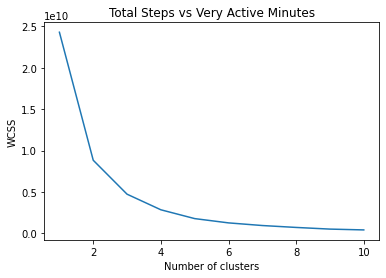

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Total Steps vs Very Active Minutes')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


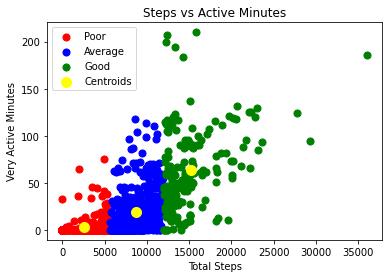

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans1 = kmeans.fit_predict(X)
kmeans1 = kmeans.fit(X)

plt.scatter(X[y_kmeans1 == 0, 0], X[y_kmeans1 == 0, 1], s = 50, c = 'red', label = 'Poor')
plt.scatter(X[y_kmeans1 == 1, 0], X[y_kmeans1 == 1, 1], s = 50, c = 'blue', label = 'Average')
plt.scatter(X[y_kmeans1 == 2, 0], X[y_kmeans1 == 2, 1], s = 50, c = 'green', label = 'Good')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Steps vs Active Minutes')
plt.xlabel('Total Steps')
plt.ylabel('Very Active Minutes')
plt.legend()
plt.show()

In [ ]:
pickle.dump(kmeans1, open('Steps_VS_Active-Minutes.pkl', 'wb'))

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

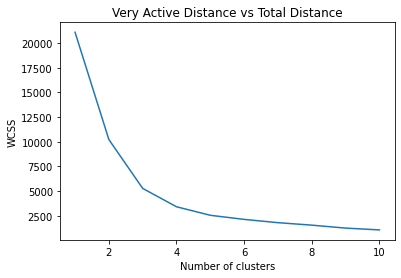

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(Y)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Very Active Distance vs Total Distance')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


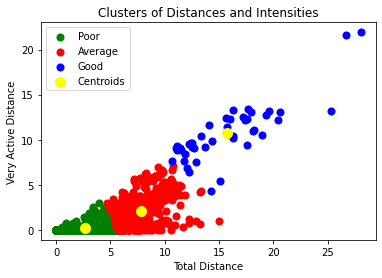

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans2 = kmeans.fit_predict(Y)
kmeans2 = kmeans.fit(Y)

plt.scatter(Y[y_kmeans2 == 2, 0], Y[y_kmeans2 == 2, 1], s = 50, c = 'green', label = 'Poor')
plt.scatter(Y[y_kmeans2 == 0, 0], Y[y_kmeans2 == 0, 1], s = 50, c = 'red', label = 'Average')
plt.scatter(Y[y_kmeans2 == 1, 0], Y[y_kmeans2 == 1, 1], s = 50, c = 'blue', label = 'Good')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Distances and Intensities')
plt.xlabel('Total Distance')
plt.ylabel('Very Active Distance')
plt.legend()
plt.show()

In [ ]:
pickle.dump(kmeans2, open('Distance_VS_Intensity.pkl', 'wb'))

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

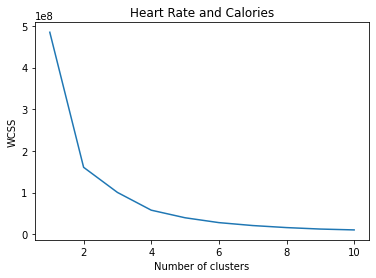

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(Z)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Heart Rate and Calories')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


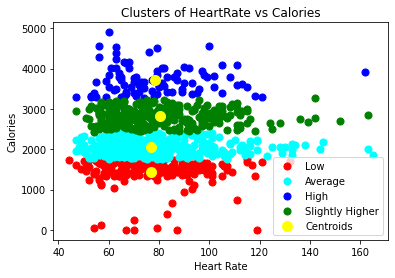

In [ ]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans3 = kmeans.fit_predict(Z)
kmeans3 = kmeans.fit(Z)

plt.scatter(Z[y_kmeans3 == 0, 0], Z[y_kmeans3 == 0, 1], s = 50, c = 'red', label = 'Low')
plt.scatter(Z[y_kmeans3 == 3, 0], Z[y_kmeans3 == 3, 1], s = 50, c = 'cyan', label = 'Average')
plt.scatter(Z[y_kmeans3 == 1, 0], Z[y_kmeans3 == 1, 1], s = 50, c = 'blue', label = 'High')
plt.scatter(Z[y_kmeans3 == 2, 0], Z[y_kmeans3 == 2, 1], s = 50, c = 'green', label = 'Slightly Higher')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Clusters of HeartRate vs Calories')
plt.xlabel('Heart Rate')
plt.ylabel('Calories')
plt.legend()
plt.show()

In [ ]:
pickle.dump(kmeans3, open('Heart-Rate_vs_Calories.pkl', 'wb'))

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

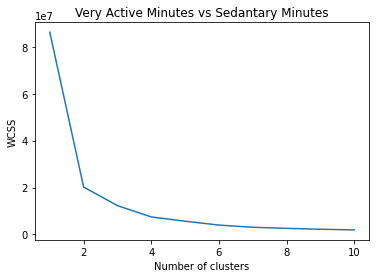

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(A)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Very Active Minutes vs Sedantary Minutes')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


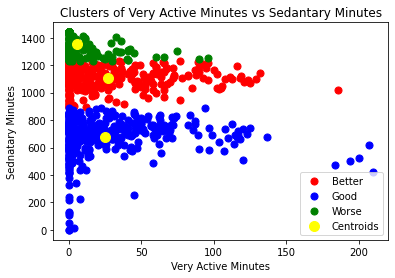

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans4 = kmeans.fit_predict(A)
kmeans4 = kmeans.fit(A)

plt.scatter(A[y_kmeans4 == 2, 0], A[y_kmeans4 == 2, 1], s = 50, c = 'red', label = 'Better')
plt.scatter(A[y_kmeans4 == 1, 0], A[y_kmeans4 == 1, 1], s = 50, c = 'blue', label = 'Good')
plt.scatter(A[y_kmeans4 == 0, 0], A[y_kmeans4 == 0, 1], s = 50, c = 'green', label = 'Worse')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Very Active Minutes vs Sedantary Minutes')
plt.xlabel('Very Active Minutes')
plt.ylabel('Sednatary Minutes')
plt.legend()
plt.show()

In [ ]:
pickle.dump(kmeans4, open('Active-Min_VS_Sedantry-Minutes.pkl', 'wb'))

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

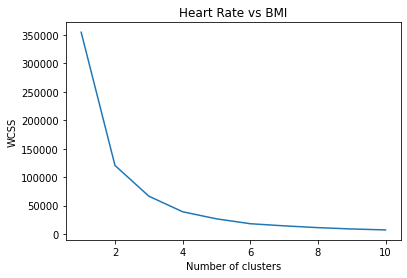

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(B)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Heart Rate vs BMI')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


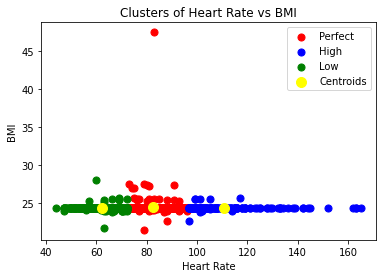

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans5 = kmeans.fit_predict(B)
kmeans5 = kmeans.fit(B)

plt.scatter(B[y_kmeans5 == 2, 0], B[y_kmeans5 == 2, 1], s = 50, c = 'red', label = 'Perfect')
plt.scatter(B[y_kmeans5 == 1, 0], B[y_kmeans5 == 1, 1], s = 50, c = 'blue', label = 'High')
plt.scatter(B[y_kmeans5 == 0, 0], B[y_kmeans5 == 0, 1], s = 50, c = 'green', label = 'Low')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Heart Rate vs BMI')
plt.xlabel('Heart Rate')
plt.ylabel('BMI')
plt.legend()
plt.show()

In [ ]:
pickle.dump(kmeans5, open('Heart-Rate_VS_BMI.pkl', 'wb'))

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

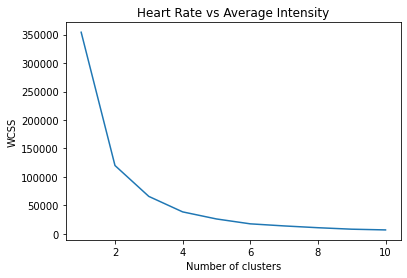

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(C)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Heart Rate vs Average Intensity')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


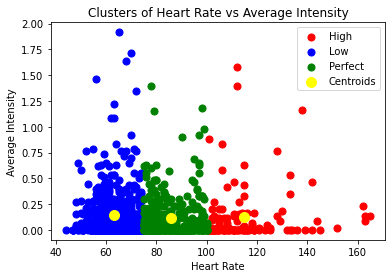

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans6 = kmeans.fit_predict(C)
kmeans6 = kmeans.fit(C)

plt.scatter(C[y_kmeans6 == 2, 0], C[y_kmeans6 == 2, 1], s = 50, c = 'red', label = 'High')
plt.scatter(C[y_kmeans6 == 1, 0], C[y_kmeans6 == 1, 1], s = 50, c = 'blue', label = 'Low')
plt.scatter(C[y_kmeans6 == 0, 0], C[y_kmeans6 == 0, 1], s = 50, c = 'green', label = 'Perfect')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Heart Rate vs Average Intensity')
plt.xlabel('Heart Rate')
plt.ylabel('Average Intensity')
plt.legend()
plt.show()

In [ ]:
pickle.dump(kmeans6, open('Heart-Rate_VS_Active-Intensity.pkl', 'wb'))

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

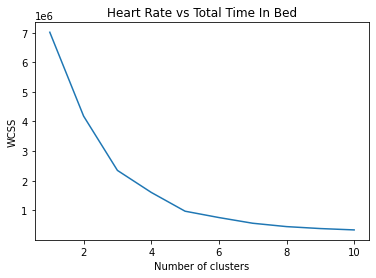

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(D)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Heart Rate vs Total Time In Bed')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


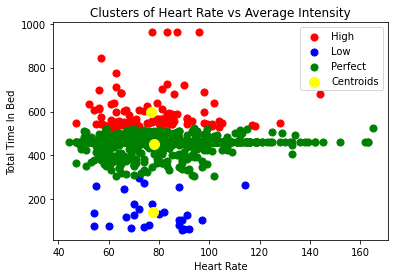

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans7 = kmeans.fit_predict(D)
kmeans7 = kmeans.fit(D)

plt.scatter(D[y_kmeans7 == 2, 0], D[y_kmeans7 == 2, 1], s = 50, c = 'red', label = 'High')
plt.scatter(D[y_kmeans7 == 1, 0], D[y_kmeans7 == 1, 1], s = 50, c = 'blue', label = 'Low')
plt.scatter(D[y_kmeans7 == 0, 0], D[y_kmeans7 == 0, 1], s = 50, c = 'green', label = 'Perfect')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Heart Rate vs Average Intensity')
plt.xlabel('Heart Rate')
plt.ylabel('Total Time In Bed')
plt.legend()
plt.show()

In [ ]:
pickle.dump(kmeans7, open('Heart-Rate_VS_Average-Intensity.pkl', 'wb'))

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

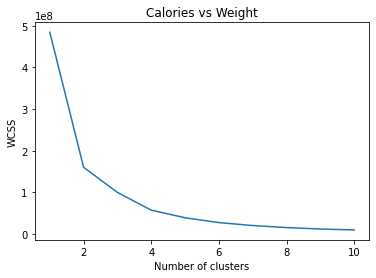

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(E)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Calories vs Weight')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


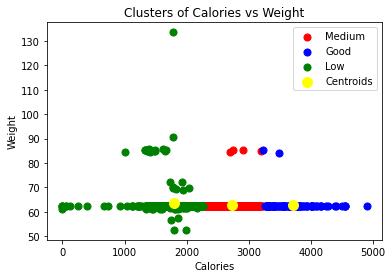

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans8 = kmeans.fit_predict(E)
kmeans8 = kmeans.fit(E)

plt.scatter(E[y_kmeans8 == 2, 0], E[y_kmeans8 == 2, 1], s = 50, c = 'red', label = 'Medium')
plt.scatter(E[y_kmeans8 == 1, 0], E[y_kmeans8 == 1, 1], s = 50, c = 'blue', label = 'Good')
plt.scatter(E[y_kmeans8 == 0, 0], E[y_kmeans8 == 0, 1], s = 50, c = 'green', label = 'Low')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Calories vs Weight')
plt.xlabel('Calories')
plt.ylabel('Weight')
plt.legend()
plt.show()

In [ ]:
pickle.dump(kmeans8, open('Calories_VS_Weight.pkl', 'wb'))